In [0]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Neural network architectures
This exercise focuses on the classification of the FashionMNIST dataset using two types of neural network architectures: the Multi-Layer Perceptron (MLP) and the Convolutional Neural Network (CNN). The performance of these models will be assessed using the evaluation metrics introduced in earlier exercises.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#MLP1">Task 1: Training basic MLP</a>
            </li>
            <li>
            <a href="#MLP3">Task 2: Evaluation</a>
            </li>
            <li>
            <a href="#MLP33">Task 3: Training basic MLP modifying hyperparame…</a>
            </li>
            <li>
            <a href="#MLP33333">Task 4: Comparison</a>
            </li>
            <li>
            <a href="#CNN1">Task 5: CNN architecture</a>
            </li>
            <li>
            <a href="#CNN11">Task 6: Training a basic CNN</a>
            </li>
            <li>
            <a href="#CNN21">Task 7: Evaluation</a>
            </li>
            <li>
            <a href="#CNN211">Task 8: Training a basic CNN modifying hyperpara…</a>
            </li>
            <li>
            <a href="#CNN3">Task 9: Evaluation</a>
            </li>
            <li>
            <a href="#CNN311">Task 10: Evaluation</a>
            </li>
            <li>
            <a href="#modifications">Task 11: Adding a hidden layer</a>
            </li>
            <li>
            <a href="#CNN20101">Task 12: Compare performance</a>
            </li>
            <li>
            <a href="#CNN_mod">Task 13: Compare architectures</a>
            </li>
            <li>
            <a href="#CNN233">Task 14: Compare performance</a>
            </li>
            <li>
            <a href="#CNN2123">Task 15: Update architecture</a>
            </li>
            <li>
            <a href="#modifications3">Task 16: Adding a convolutional layer</a>
            </li>
            <li>
            <a href="#CNN003">Task 17: Compare architectures</a>
            </li>
            <li>
            <a href="#modifications4">Task 18: Compare architectures</a>
            </li>
            <li>
            <a href="#additional">Task 19: Additional improvements</a>
            </li>
        </ul>
    </div>
</article>

<article class="message is-danger">
  <div class="message-header">Time sink warning</div>
  <div class="message-body">

  This exercise examines the impact of network architectures and hyperparameters on training and performance. **Notice getting optimal results can become a time sink. Make well-argued choices as endless options and combinations are available.** Focus on informed decisions given the vast number of options available. Most of the code is provided requiring only modifications to hyperparameter settings and network architecture. This setup allows for focused analysis of outcomes and their connection to theoretical concepts.


  </div>
</article>
## Modifying hyperparameters
This part of the exercise introduces and experiments with the hyperparameters of an NN such as the _Learning rate_ and the _batch size_. 
### Multilayer Perceptron
The following tasks are about training and modifying an MLP to classify the FashionMNIST dataset. The following functions will be used throughout the exercise:
- `train_pytorch_network`
: takes an NN class as a parameter. Used for model training and for visualizing the performance of the models throughout the exercise. 
- `evaluate_overall_metrics`
 in the `cnn_util.py`
 file takes a dictionary containing a key-value pair of a name and a file path to the trained model and a list with the class names. The function returns a plot showing the overall _accuracy_, _precision_ and _recall_ for the validation data, comparing each model trained. 
- `evaluate`
 in the `cnn_util.py`
 file takes a dictionary containing a key-value pair of a name and a file path to the trained model and a list with the class names. The function computes a confusion matrix as well as provides plots visualizing _Accuracy_, _Precision_ and _Recall_ class-wise for the validation data, comparing each model trained. 

<article class="message task"><a class="anchor" id="MLP1"></a>
    <div class="message-header">
        <span>Task 1: Training basic MLP</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Examine the `networks.py`
 file and locate the `MLPBasic()`
 class. Examine the class to gain an overview of the network architecture.
2. Run the cell below to train the MLP. The cell will automatically save the trained model in the `models/`
 directory.



</div></article>



In [0]:
from torch import optim
from trainers import PyTorchTrainer
from networks import *
from torchvision import transforms
from cnn_util import *
from fashionmnist_utils.mnist_reader import load_mnist

# uncomment if not first run
#from models import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the 'models' folder
os.makedirs("models", exist_ok=True)
# Create the 'runs' folder
os.makedirs("runs", exist_ok=True) 


def train_pytorch_network(to_train):

    transform = transforms.ToTensor() ## conversion from PIL image format to torch tensors.

    network = to_train

    trainerNetwork = PyTorchTrainer(
        nn_module=network,
        transform=transform,
        optimizer=optim.SGD(network.parameters(), lr=1e-2, momentum=0.5),
        batch_size=128
    ) 

    print("training the network started")
    classes = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    trainerNetwork.train(10)
    trainerNetwork.plot_metrics(classes)


# Evaluate the model
    logger, predictions = trainerNetwork.evaluate()
    trainerNetwork.save()
    print("training and saving the network ended")

In [0]:
train_pytorch_network(MLPBasic())

<article class="message task"><a class="anchor" id="MLP3"></a>
    <div class="message-header">
        <span>Task 2: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Evaluate the performance of the model during training:    - Inspect the accuracy, loss and training time. What patterns or trends do you observe in the loss and accuracy graphs throughout training?





</div></article>



In [0]:
# Write your reflections here...

The next task experiments with different hyperparameters. Use the function`evaluate_overall_metrics`
 to visualize and compare the overall performance of the models and use the `evaluate`
 function to visualise and compare the performance of the models class-wise. [Figure 1](#ex) provides an example of the type of plots returned by the functions.
<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">

<div style="float: left; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="ex">

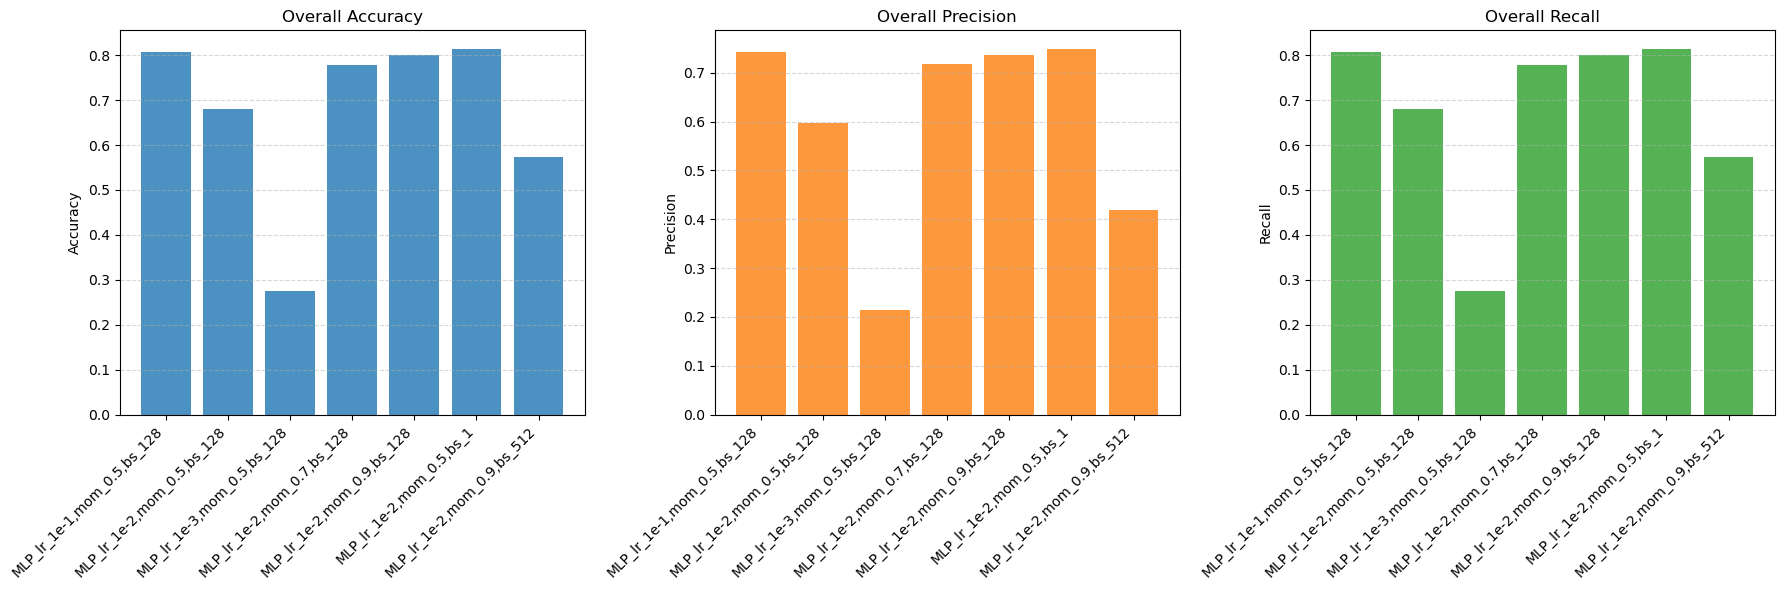

<figcaption class="figure-caption has-text-center">Figure 1: Example of output from the `evaluate_overall_metrics`
 function.
</figcaption>
</figure>
</div>


</div>

<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="model">

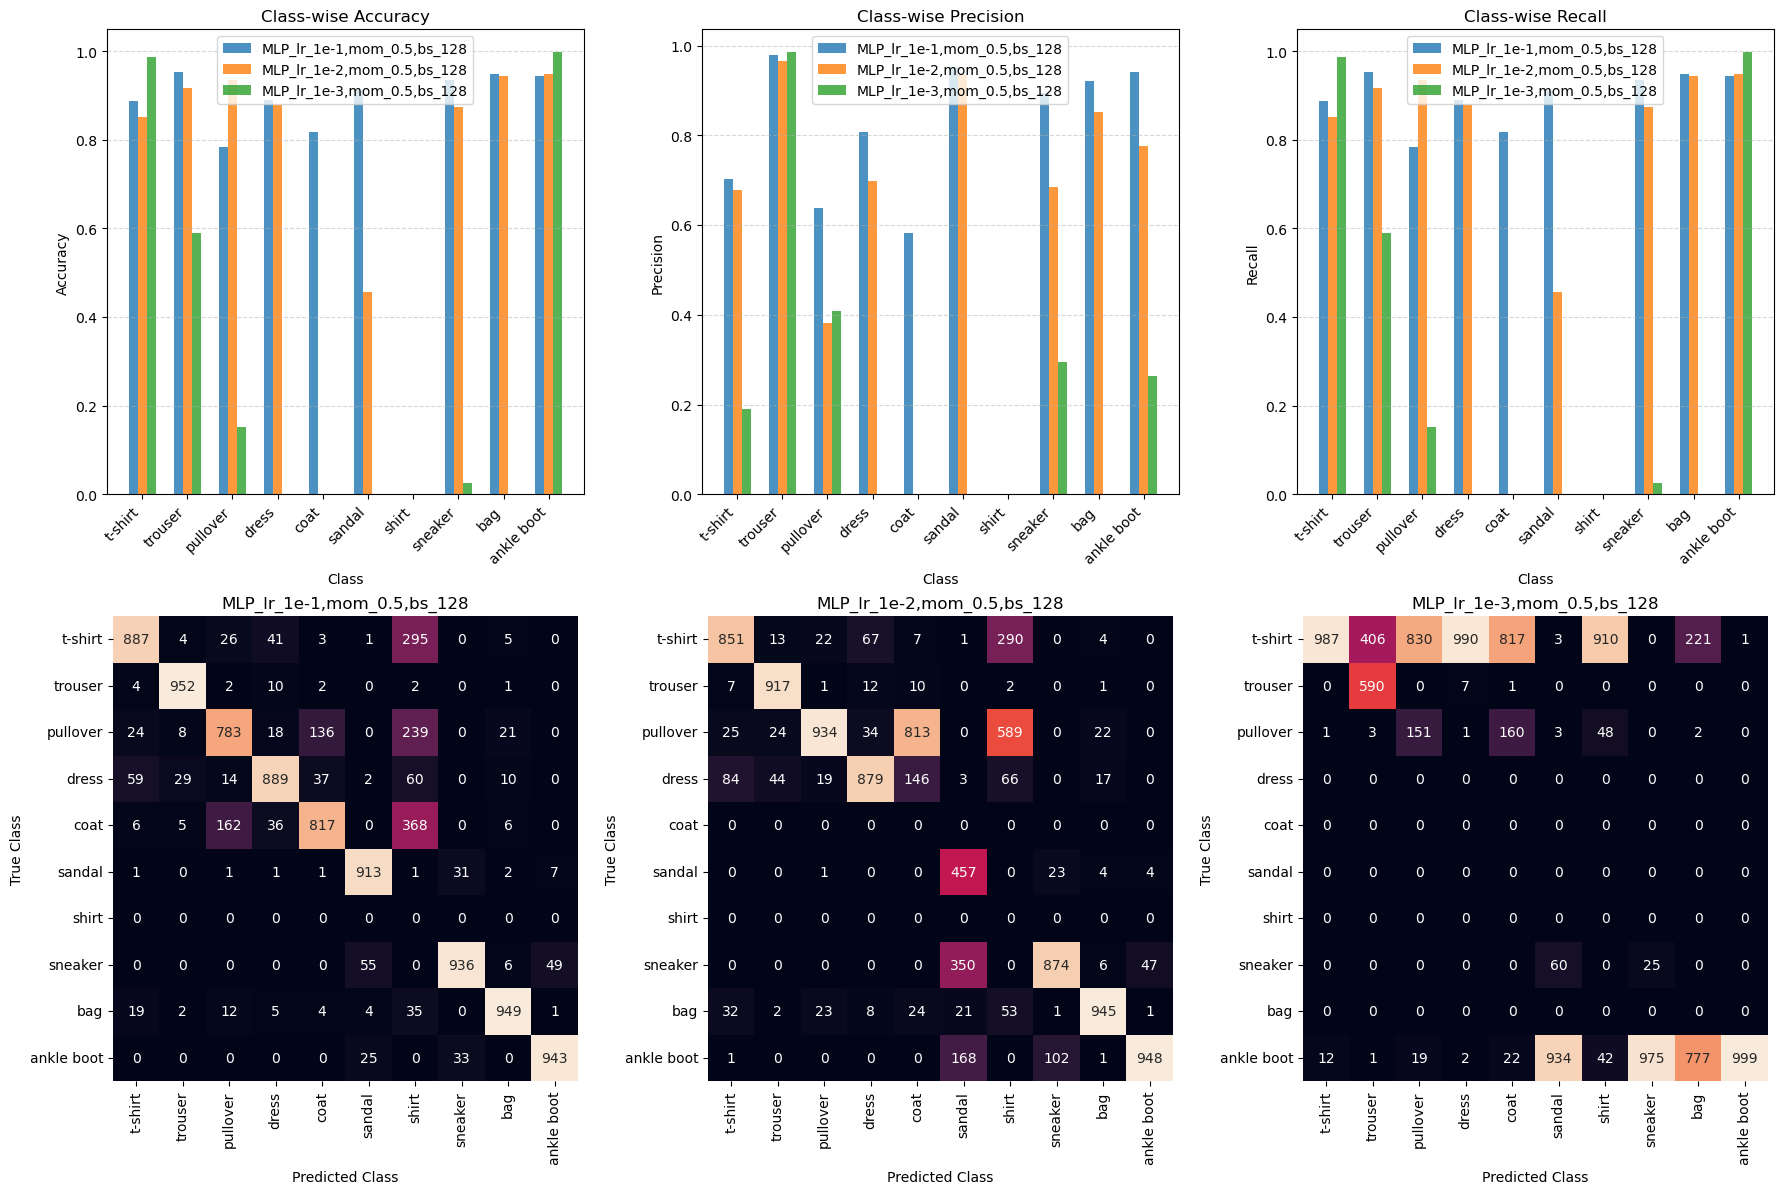

<figcaption class="figure-caption has-text-center">Figure 2: Example of output from the `evaluate`
 function.
</figcaption>
</figure>
</div>


</div>



</div>

<article class="message task"><a class="anchor" id="MLP33"></a>
    <div class="message-header">
        <span>Task 3: Training basic MLP modifying hyperparameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Explore how different hyperparameters influence the training and performance of the model:
    - Modify training variables and train new models:        - Set the learning rate to 1e-3, and 1e-1. 
        - Reset the learning rate to 1e-2 then modify the batch size to 1 and 512. 


    - Fill the dictionaries below with the paths of the trained models.
    - Visualize the overall metrics of performance for all models trained using the `evaluate_overall_metrics`
 function.
    - Visualize the performance by running the `evaluate`
 function.

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  The cell below is a guide for how to load the models after training. The models are located in the `models`
 folder.


  </div>
</article>




</div></article>



In [0]:
MLP_models = {'MLP1...': PyTorchTrainer.load('models/MLPBasic1....pkl'), # replace this with your own model
    'MLP2...': PyTorchTrainer.load('models/MLPBasic2....pkl'), # replace this with your own model
    # Add more...
    }

<article class="message task"><a class="anchor" id="MLP33333"></a>
    <div class="message-header">
        <span>Task 4: Comparison</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Compare the performance of the models:    - Evaluate the models using accuracy, precision, recall, and heatmaps.
    - Discuss how the changes in hyperparameters, such as learning rate and batch size, influence these performance metrics. Highlight any trends or trade-offs observed, such as improvements in accuracy versus potential declines in precision or recall.


2. How is the training time affected by the different hyperparameters?



</div></article>



In [0]:
# Write your reflections here...

### Convolutional Neural Network
The following tasks investigate a CNN architecture for the same problem.
<article class="message task"><a class="anchor" id="CNN1"></a>
    <div class="message-header">
        <span>Task 5: CNN architecture</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Locate the `CNNBasic`
 model defined in `networks.py`
 and explain the architecture.



</div></article>



In [0]:
# Write your explanation here...

<article class="message task"><a class="anchor" id="CNN11"></a>
    <div class="message-header">
        <span>Task 6: Training a basic CNN</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to train the `CNNBasic`
 model.



</div></article>



In [0]:
train_pytorch_network(CNNBasic())

<article class="message task"><a class="anchor" id="CNN21"></a>
    <div class="message-header">
        <span>Task 7: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Analyze the training figures and describe the key characteristics of the model’s training process.



</div></article>



In [0]:
# Write your reflections here...

<article class="message task"><a class="anchor" id="CNN211"></a>
    <div class="message-header">
        <span>Task 8: Training a basic CNN modifying hyperparameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Experiment with the different hyperparameters affecting the training and performance of the model.    - Modify the following hyperparameters and train new model:        - Set the learning rate to 1e-4, and 1e-5. 
        - Modify the batch size to 256 and 1024. 


    - Fill the dictionary below with the paths of the trained models.
    - Visualize the overall performance by running `evaluate_overall_metrics`
 function.
    - Visualize the class-wise performance by running the `evaluate`
 function.





</div></article>



In [0]:
CNN_models = {'CNN1...': PyTorchTrainer.load('models/CNNBasic1....pkl'), # replace this with your own model
    'CNN2...': PyTorchTrainer.load('models/CNNBasic2....pkl'), # replace this with your own model
    # Add more...
    }

## Comparing the different model architectures
<article class="message task"><a class="anchor" id="CNN3"></a>
    <div class="message-header">
        <span>Task 9: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In the cell below:
1. Select the best performing MLP and CNN and update the cell below to store these models in the `MLPCNN_models`
 dictionary.
2. Use the  `evaluate_overall_metrics`
 function to visualize the overall performance of the models.
3. Use the `evaluate`
 function to visualize the class-wise performance of the models.



</div></article>



In [0]:
MLPCNN_models = {'MLP1...': PyTorchTrainer.load('models/MLPBasic1....pkl'), # replace this with your own model
    'CNN1...': PyTorchTrainer.load('models/CNNBasic2....pkl'), # replace this with your own model
    # Add more...
    }

Evaluate the performance of the different architectures.
<article class="message task"><a class="anchor" id="CNN311"></a>
    <div class="message-header">
        <span>Task 10: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Training
    - Analyze the figures and explain the key characteristics of the training process for the models.


2. Metrics
    - Assess the performance of the models by examining the confusion matrices and comparing the MLP and CNN models in terms of accuracy, precision, and recall. Discuss the strengths and weaknesses of each model based on the metrics.





</div></article>



In [0]:
# Write your reflections here...

## Modifying architectures
The next part of the exercise is about experimenting with the architecture of an NN such as _number of layers_, _number of perceptrons (nodes)_ and _kernel size_.
### MLP
The following task will add a hidden layer to the MLP model. 
<article class="message task"><a class="anchor" id="modifications"></a>
    <div class="message-header">
        <span>Task 11: Adding a hidden layer</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Locate the class `MLP_modified`
 in the `networks.py`
 file. The `MLP_modified`
 class is a copy of the `MLPBasic`
 and the following steps are about making changes in the architecture.
2. Modify the architecture by adding a new hidden layer with 256 nodes, by updating the constructor. Ensure that the number of input and output features match between the layers.
3. Update the `forward`
 function to ensure this new hidden layer is used in the predictions. 
4. Train the model by running the cell below.



</div></article>



In [0]:
train_pytorch_network(MLP_modified())

<article class="message task"><a class="anchor" id="CNN20101"></a>
    <div class="message-header">
        <span>Task 12: Compare performance</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Examine the training figures to identify and explain the characteristics of the model’s training process. 



</div></article>



In [0]:
# Write your reflections here ...

Evaluate the modified MLP against the `MLPBasic()`

<article class="message task"><a class="anchor" id="CNN_mod"></a>
    <div class="message-header">
        <span>Task 13: Compare architectures</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In the cell below:
1. Identify the best-performing `MLP`
 and `MLPModified`
 models based on the evaluation metrics. Update the cell below to store these selected models in the `modelsMLPModified`
 dictionary.
2. Use the `evaluate_overall_metrics`
 function to visualize the overall performance of the models.
3. Use the `evaluate`
 function to visualize the class-wise performance of the models.



</div></article>



In [0]:
MLPModified_model = {'MLP1...': PyTorchTrainer.load('models/MLP1....pkl'), # replace this with your own model
    'MLP_mod1...': PyTorchTrainer.load('models/MLP_mod1....pkl'), # replace this with your own model
    'MLP_mod2...': PyTorchTrainer.load('models/MLP_mod2....pkl'), # replace this with your own model
    # Add more...
    }

<article class="message task"><a class="anchor" id="CNN233"></a>
    <div class="message-header">
        <span>Task 14: Compare performance</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Evaluate the performance of the models by analyzing the confusion matrices. Compare the MLP and CNN models in terms of key metrics such as accuracy, precision, and recall, and provide a detailed explanation of their relative strengths and weaknesses based on these metrics



</div></article>



In [0]:
# Write your reflections here...

<article class="message task"><a class="anchor" id="CNN2123"></a>
    <div class="message-header">
        <span>Task 15: Update architecture</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Change the number of hidden nodes to 512 (adjust the other layers accordingly). 
2. Rerun the cell above to train the new model. 
3. Include the new model in the dictionary. 
4. Evaluate the model and compare it with the others as in [Task 13](#CNN_mod).



</div></article>

## Convolutional Neural Network
The following task will involve modifying the architechture of the CNN. 
<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  - Recall that the kernel size influences the size of the output image. Specifically, for kernel size $k$, the output has dimensions $w-(k-1) \times h-(k-1)$ where $w$ is the width and $h$ is the height of an image. Adding a convolutional layer is consequently a bit more tricky than a linear layer because the dimensions between the layers need to match. You will likely need to debug the model a few times to get it right, therefor we encourage you to carefully examine the structure of the network before modifying it.
- Convolutional layers MAY be accompanied with a max pooling layer, but remember to use an activation function.
- The `max_pool2d`
 operation in the`forward`
 function halves the image resolution. 



  </div>
</article>
<article class="message task"><a class="anchor" id="modifications3"></a>
    <div class="message-header">
        <span>Task 16: Adding a convolutional layer</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Locate the class `CNN_modified()`
 in the `networks.py`
 file.
2. Examine the class to gain an overview of the network architecture. _Note that it is a copy of the CNNBasic() class_.
3. Add a new `Conv2d`
 layer to the `CNN_modified`
 class by decreasing the kernel size of the existing first layer and add the new layer as the second layer.

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  Use `tensor.size`
 to get the size of any tensor.


  </div>
</article>
4. Update the `forward`
 method to ensure this new hidden layer is used in the predictions. 
5. Train the model by running the cell below.



</div></article>



In [0]:
train_pytorch_network(CNN_modified())

<article class="message task"><a class="anchor" id="CNN003"></a>
    <div class="message-header">
        <span>Task 17: Compare architectures</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Fill in the dictionary below with the best performing `CNNBasic()`
 model and the `CNNModified()`
.
2. Visualize the overall performance by running `evaluate_overall_metrics`
 function.
3. Visualize the class-wise performance by running the `evaluate`
 function.



</div></article>



In [0]:
CNNModified_model = {'CNN1...': PyTorchTrainer.load('models/CNN1....pkl'), # replace this with your own model
    'CNN_mod1...': PyTorchTrainer.load('models/CNN_mod1....pkl'), # replace this with your own model
    'CNN_mod2...': PyTorchTrainer.load('models/CNN_mod2....pkl'), # replace this with your own model
    # Add more...
    }

<article class="message task"><a class="anchor" id="modifications4"></a>
    <div class="message-header">
        <span>Task 18: Compare architectures</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


Evaluate the modified CNN against the `CNNBasic()`
 following the steps: 
1. During training:
    - Include the trained `CNNBasic()`
and the `CNNModified()`
 in the graphs (leave out the rest).
    - What patterns or trends do you observe in the loss and accuracy graphs and training time throughout training?


2. Update the dictionary below with the trained models and execute the cell. Compare the performance of the models, providing an analysis and explanation of the observed differences.

3. Change the kernel size and the number of kernels to achieve the best performing model, while avoiding overfitting. Run the cell above to train the new model. Include the new model in the dictionary, evaluate the model and compare it with the others.




</div></article>



In [0]:
# Write your reflections here...

This exercise has briefly introduced some modifications that can improve the performance of a model. While this was just a brief introduction many more alterations can be performed. However, as noted, this easily becomes a time sink. The next task is optional and continues the introduction of possible alterations.
<article class="message task"><a class="anchor" id="additional"></a>
    <div class="message-header">
        <span>Task 19: Additional improvements <em>(optional)</em></span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights hard"></i>
        </span>
    </div>
<div class="message-body">


Change the activation functions, the number of hidden layers, and the training setup to achieve the best performing model. Notice, that a huge amount of time can be spent on fiddling with the models.


</div></article>

